In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

#### Import Dataset

In [22]:
Credit_card = pd.read_csv("C:\\Users\\alokk\\1-Data Science Srk Sir\\27-Capstop Project\\Credit card Predicission\\Credit_card.csv")
Credit_card_label = pd.read_csv("C:\\Users\\alokk\\1-Data Science Srk Sir\\27-Capstop Project\\Credit card Predicission\\Credit_card_label.csv")

In [23]:
Credit_card.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [24]:
Credit_card_label.columns

Index(['Ind_ID', 'label'], dtype='object')

In [17]:
Credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2


#### Merging Both DataFrames using Pandas Merge Function

In [18]:
Credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [25]:
data = pd.merge(Credit_card,Credit_card_label, on = "Ind_ID", how="inner")


In [26]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [27]:
df = data.copy()

In [11]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2,0
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1,0
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2,0
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1,0
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2,0


In [20]:
df.shape
print("Total Numaber of Rows in Dataset :",data.shape[0])
print("Total Numaber of Columns in Dataset :",data.shape[1])


Total Numaber of Rows in Dataset : 1548
Total Numaber of Columns in Dataset : 19


#####  Data Exploration

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

We can Gather valuable information about the dataset:
  - The dataset contains 1.548 entries(rows) & There are 19 columns in the dataset 
  - Out od 19, these 8 columns are Catagorical and 11 are Numerical Columns.
  - Several columns have missing values, including GENDER,Annual_Income, Birthday_count, and Type_Occupation.
    

### Categorical Columns

In [11]:
categorical_columns = df.select_dtypes(include = "object").columns
for i in categorical_columns:
    print(i)

GENDER
Car_Owner
Propert_Owner
Type_Income
EDUCATION
Marital_status
Housing_type
Type_Occupation


In [12]:
Numerical_columns = df.select_dtypes(include = "number")
for j in Numerical_columns:
    print(j)

Ind_ID
CHILDREN
Annual_income
Birthday_count
Employed_days
Mobile_phone
Work_Phone
Phone
EMAIL_ID
Family_Members
label


### Check for Missing Values

In [13]:
df.isnull().sum()/len(df) * 100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

Here we can see that:
- Gender: 0.45% Missing Values
- Annual_income: 1.48% Missing Values
- Birthday_count: 1.42% Missing Values
- Type Occupation: 31.52% Missing Values


These columns have missing values in the dataset, and addressing these missing values will be important data preprocessing and analysis.

### Drop Irrelevant Features

##### The Features "Mobile_phone", "Work_Phone", "Phone", and "EMAIL_ID" are present in the dataset but are deemed unnecessary for the analysis.Drop these irrelevant Features.
##### "Types_Occupation" has a lot of missing values, around 31.52% which is whay we consider removing it.

In [29]:
df.drop(columns = ["Mobile_phone","Work_Phone","Phone","EMAIL_ID"],inplace = True)

In [30]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members', 'label'],
      dtype='object')

### Feature Enginerering
#### Creat a new columns "Approx_Age" in your DataFrame

In [16]:
import math
Age = []
for i in df["Birthday_count"]:
    if not math.isnan(i):   # Check if the value is not NaN
        a = i/365
        Age.append(round(abs(a)))
    else:
        Age.append(np.nan)
df["Age"] = Age    # Creat a new columns "Approx_Age" in your DataFrame

#### Creating an "Employed_Sataus" Feature from "Employed_days"

In [17]:
Employed_status = []
for i in df["Employed_days"]:
    if i<0:
        Employed_status.append("Employed")
    else:
        Employed_status.append("Unemloyed")
df["Employed_status"] = Employed_status

In [18]:
df = df.drop(columns = ["Birthday_count","Employed_days"],axis=1)

In [19]:
df.rename(columns={"label":"Approved_status"},inplace=True)

### Now we have 14 Features for Analysis


 Overall Statistic About The Dataset

In [20]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Family_Members,Approved_status,Age
count,1.548000e+03,1548.000000,1.525000e+03,1548.000000,1548.000000,1526.000000
mean,5.078920e+06,0.412791,1.913993e+05,2.161499,0.113049,43.952818
std,4.171759e+04,0.776691,1.132530e+05,0.947772,0.316755,11.603295
min,5.008827e+06,0.000000,3.375000e+04,1.000000,0.000000,21.000000
25%,5.045070e+06,0.000000,1.215000e+05,2.000000,0.000000,34.000000
50%,5.078842e+06,0.000000,1.665000e+05,2.000000,0.000000,43.000000
75%,5.115673e+06,1.000000,2.250000e+05,3.000000,0.000000,54.000000
max,5.150412e+06,14.000000,1.575000e+06,15.000000,1.000000,68.000000


Data Summary Report:
   - The average annual income is approximately 191,399.30, with a notable standard deviation of 113,253.00, suggesting a wide income distribution.
   - The age of individuals ranges from 21 to 68 years, with an average age of approximately 43.95 years.**
   - The dataset contains information on credit card applicants, with notable variations in annual income, family size, and the number of children.
   - However, it faces challenges such as missing data and outliers in certain features.**
   - Additionally, the dataset exhibits class imbalance, with a relatively more credit card approval rate.**
###### To build an effective credit card approval prediction model, thorough data preprocessing, including handling missing values and outliers, as well as careful model selection and evaluation, will be essential to ensure accurate predictions.

##### Check Unique values in Catadorical Columns

In [21]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Type_Occupation', 'Family_Members', 'Approved_status',
       'Age', 'Employed_status'],
      dtype='object')

In [22]:
categorical_column = df.select_dtypes(include="object").columns
for i in categorical_column:
    print(f"Unique values in {i} features")
    print(df[i].unique())
    print("-------------------------------")

Unique values in GENDER features
['M' 'F' nan]
-------------------------------
Unique values in Car_Owner features
['Y' 'N']
-------------------------------
Unique values in Propert_Owner features
['N' 'Y']
-------------------------------
Unique values in Type_Income features
['Working' 'Commercial associate' 'State servant' 'Pensioner']
-------------------------------
Unique values in EDUCATION features
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Academic degree' 'Lower secondary']
-------------------------------
Unique values in Marital_status features
['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']
-------------------------------
Unique values in Housing_type features
['House / apartment' 'Municipal apartment' 'With parents'
 'Co-op apartment' 'Office apartment' 'Rented apartment']
-------------------------------
Unique values in Type_Occupation features
['Laborers' 'Core staff' nan 'Managers' 'Medicine staff' 'Cooking staff'
 'A

### Modifiying Categories in Categorical Columns

In [23]:
# Creat a Mapping Dictionary to replace existing categories
Marital_status_mapping = {
    'Single / not married': "not married",
    "Married" : "Married",
    "Separated" : "Separated",
    "Civil marriage" : "Civil marriage",
    "Widow" : 'Widow'
}

# Use the map function to apply the mapping to the EDUCATION column
df["Marital_status"] = df["Marital_status"].map(Marital_status_mapping)
# Verify the Changs
print(df["Marital_status"].unique())

['Married' 'not married' 'Separated' 'Civil marriage' 'Widow']


In [24]:
# Create a mapping dictonary to replace exicting categories
education_mapping = {
    "Secondary / secondary special" : "Secondary Education",
    "Higher education" : "Higher Education",
    "Incomplete higher" : "Incomplete Higher",
    "Academic degree" : "Academic Degree",
    "Lower secondary" : "Lower Secondary"    
}

# Use the map function to apply the mapping to the EDUCATION column
df["EDUCATION"] = df["EDUCATION"].map(education_mapping)
# Verify the changes
print(df["EDUCATION"].unique())

['Secondary Education' 'Higher Education' 'Incomplete Higher'
 'Academic Degree' 'Lower Secondary']


### Visualizing the Dataset for Better Understanding

Distribution of numerical variables

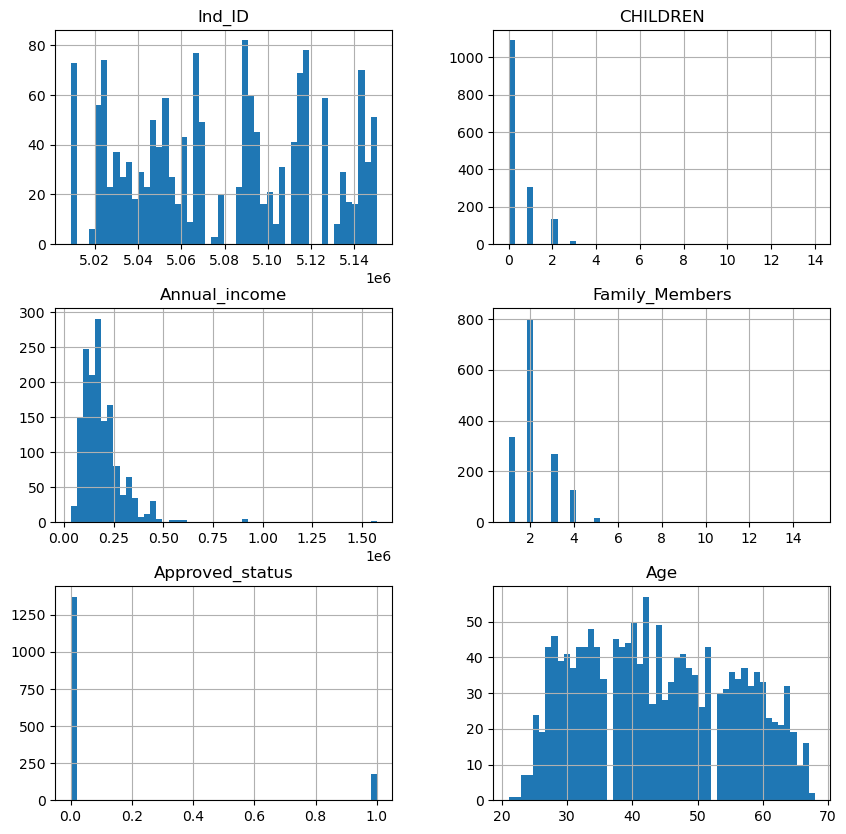

In [25]:
df.hist(bins = 50, figsize = (10,10))
plt.show()

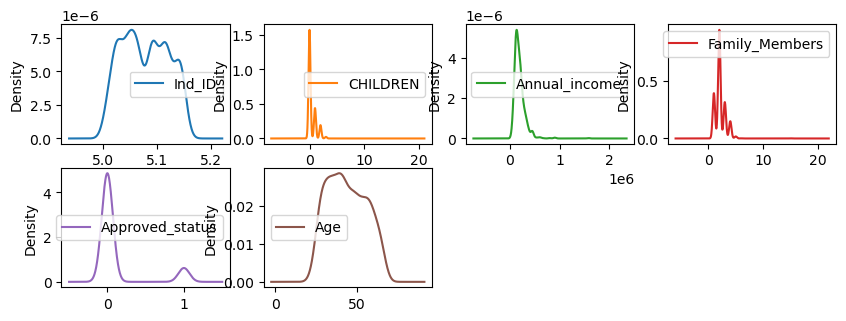

In [26]:

df.plot(kind="density", subplots=True, layout=(5, 4), sharex=False,figsize = (10,9))

# You can set the figure size using plt.figure() if needed
# Example: plt.figure(figsize=(12, 8))

plt.show()


In [27]:
numerical_columns = df.select_dtypes(include = 'number')
for i in numerical_columns:
    print(i)

Ind_ID
CHILDREN
Annual_income
Family_Members
Approved_status
Age


### Exporing the Associaation Between the Tearget variable and Input Features
 - Customers with no children (0 Children) tend to have a higher likelihood of credit card approval application.
 - Applicants with an annual income between 100,000 and 199,000 and ages between 25 and 60, are more likely to have their credit card applications approved.
 - Households consisting of two family members have a notably higher probability of credit card application approval.
 
When considering all these factors together (0 Children, Income 100k-199k, Age 25-60 and Family Size 2), individuals in this category exhibit a significantly higher likelihood of credit card application approval.

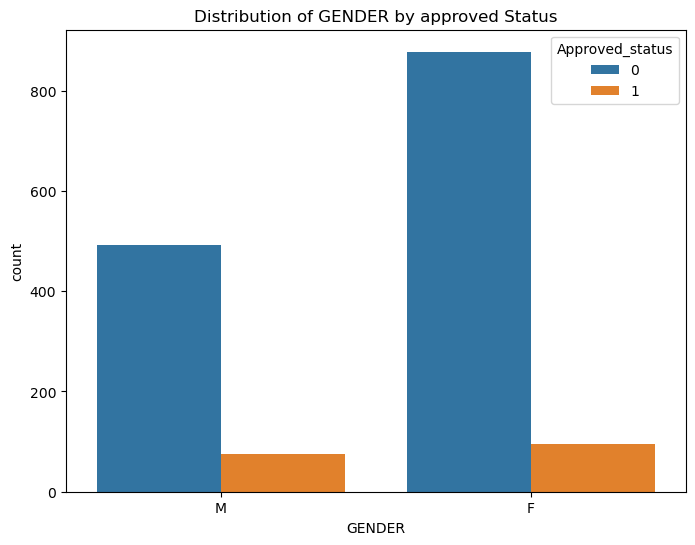

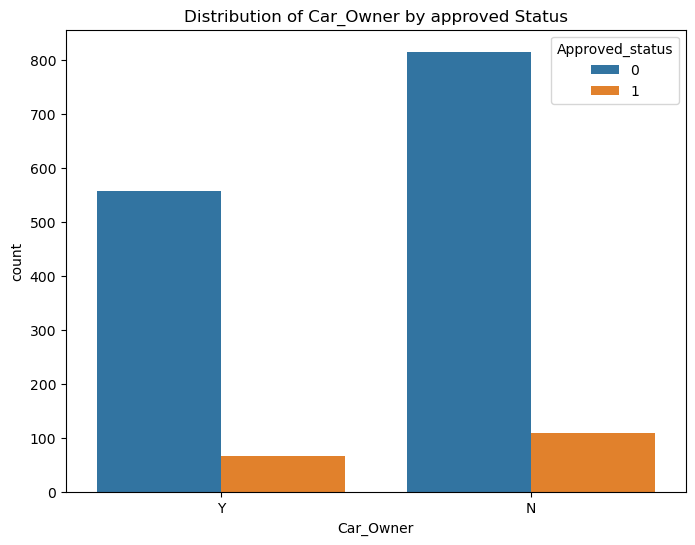

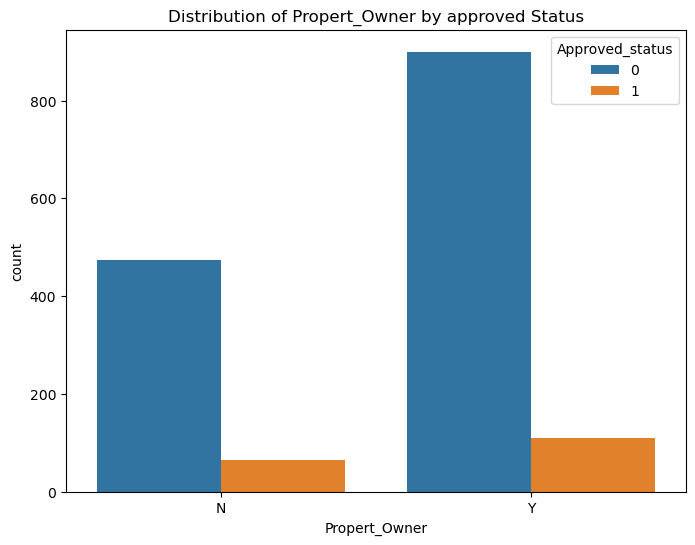

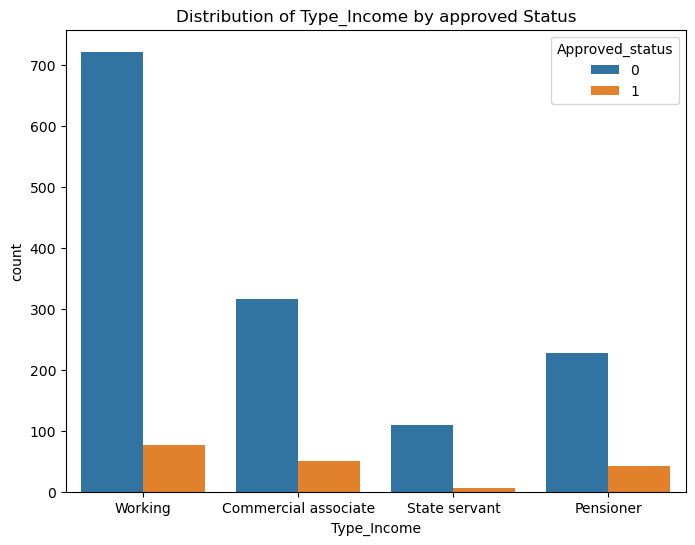

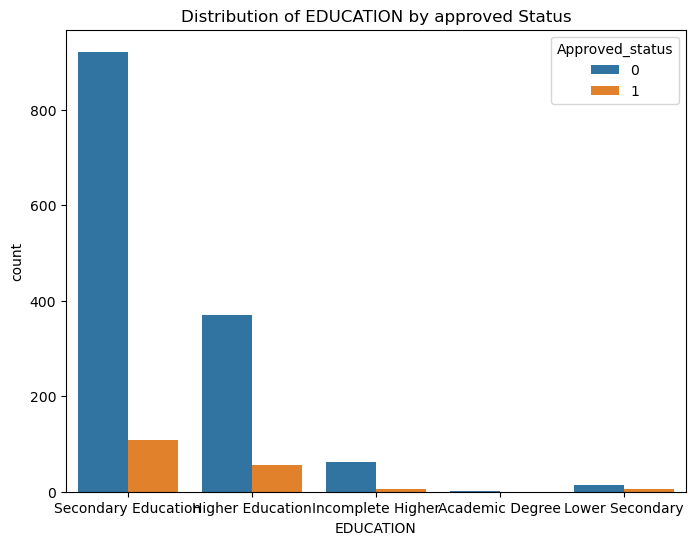

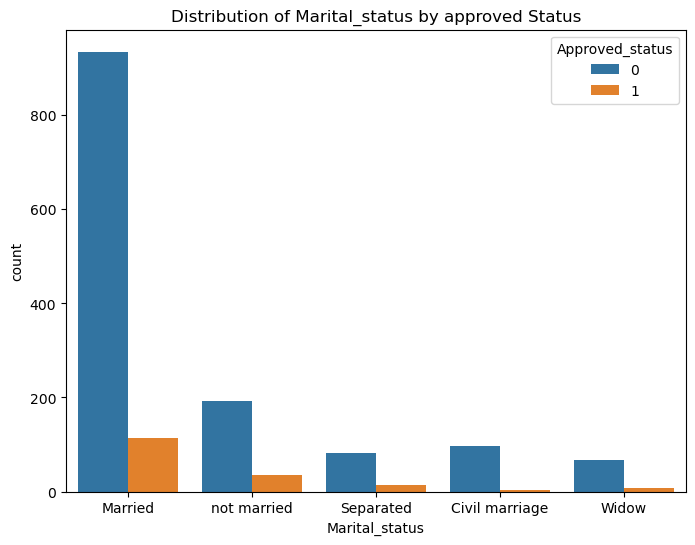

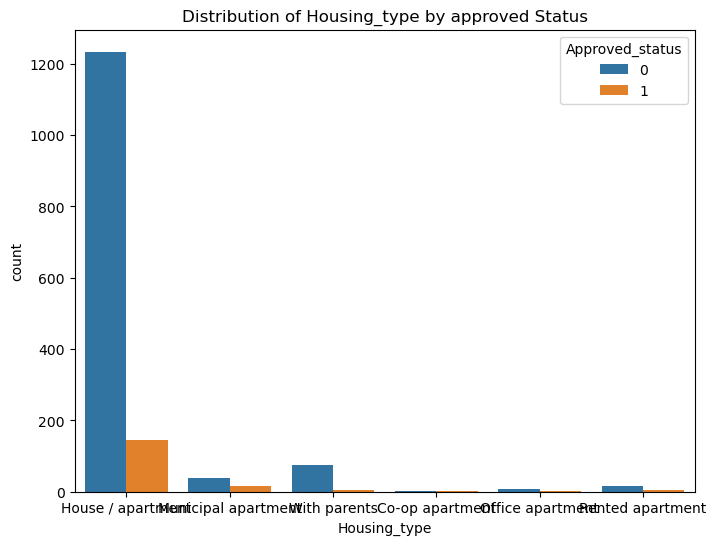

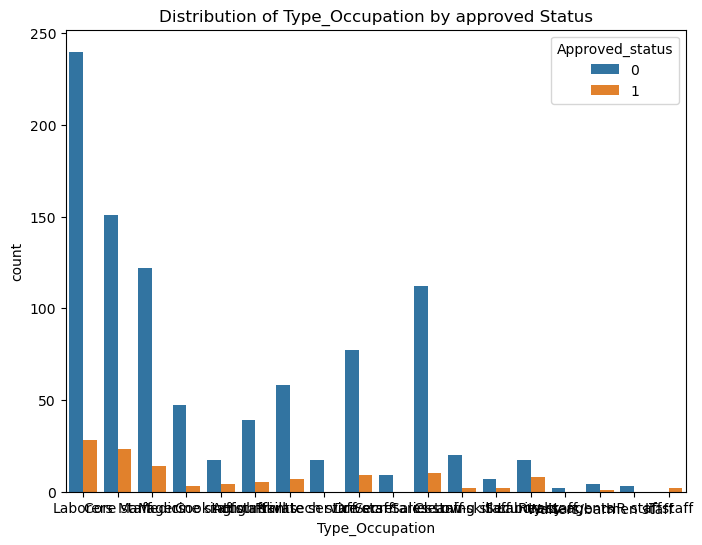

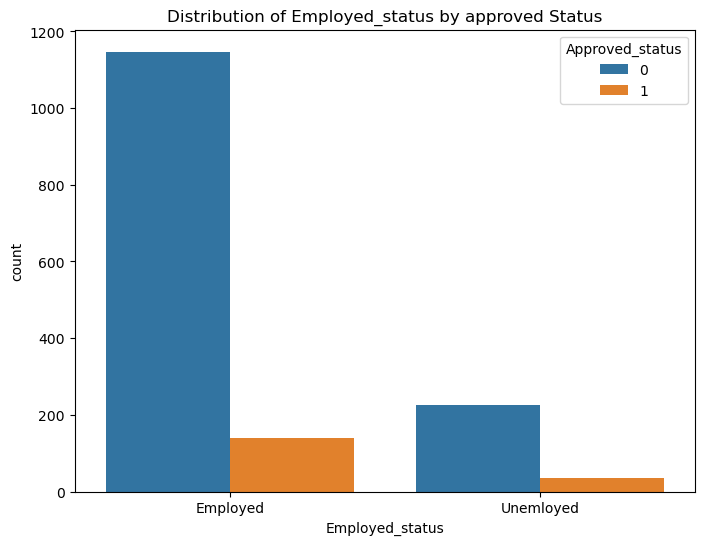

In [28]:
categorical_features = ["GENDER","Car_Owner","Propert_Owner",
                        "Type_Income","EDUCATION","Marital_status","Housing_type",
                        "Type_Occupation","Employed_status"]
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data = df, x=feature, hue = "Approved_status")
    plt.title(f"Distribution of {feature} by approved Status")

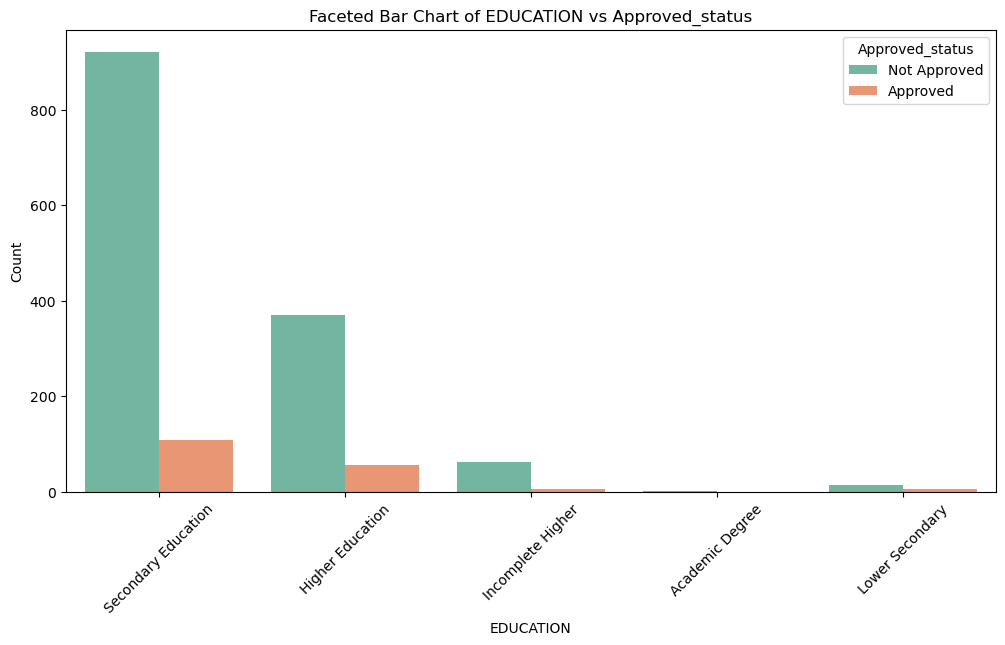

In [29]:
# Creat a faceted bar chart for EDUCATION vs Approved_status
plt.figure(figsize=(12,6))
sns.countplot(data=df, x = "EDUCATION",hue = "Approved_status", palette = "Set2")
plt.title("Faceted Bar Chart of EDUCATION vs Approved_status")
plt.xlabel("EDUCATION")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend(title="Approved_status",labels=["Not Approved","Approved"])
plt.show()

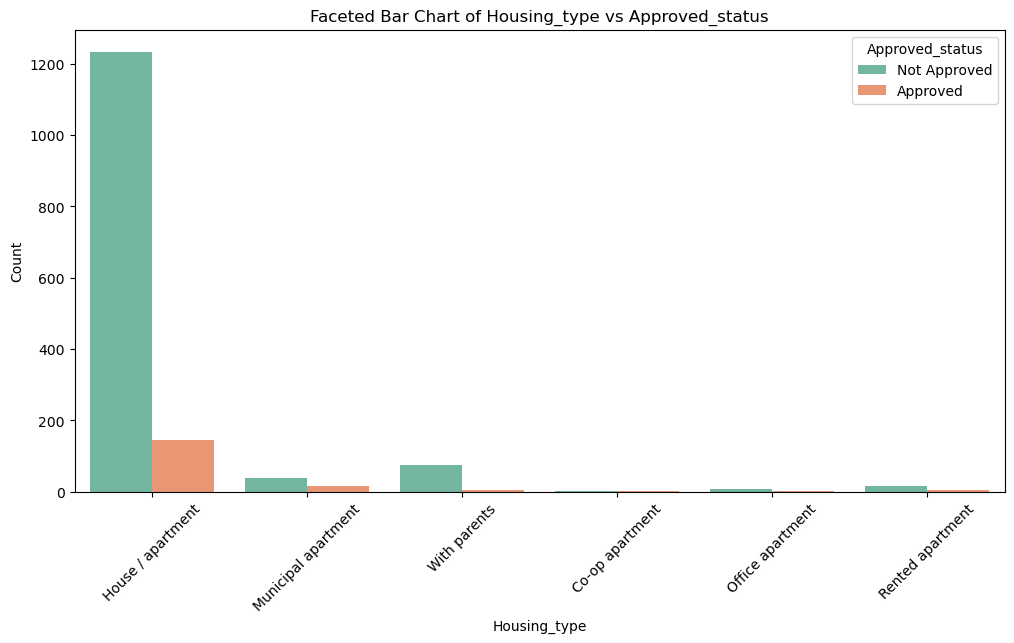

In [30]:
# Creat a faceted bar chart for Housing_type vs Approved_status
plt.figure(figsize=(12,6))
sns.countplot(data=df, x = "Housing_type",hue = "Approved_status", palette = "Set2")
plt.title("Faceted Bar Chart of Housing_type vs Approved_status")
plt.xlabel("Housing_type")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend(title="Approved_status",labels=["Not Approved","Approved"])
plt.show()

## Key Findings:
### Income Type (Working)
 - Customers with a 'working' income type tend to have a higher likelihood of their applications being approved compared to other income types.
### Marital Status(Married)
 - Married customers are more likely to have their applications approved in comparison to unmarried individuals.
### Housing Type('House/Apartment')
 - Customers residing in 'house/apartment' type housing are more likely to see their applications approved when compared to those with different housing arrangements.
### Combined Influence
 - When considering all three factors together, individuals who are 'working,' married, and live in 'house/apartment' type housing exhibit a notably higher probability of having their loan applications approved.

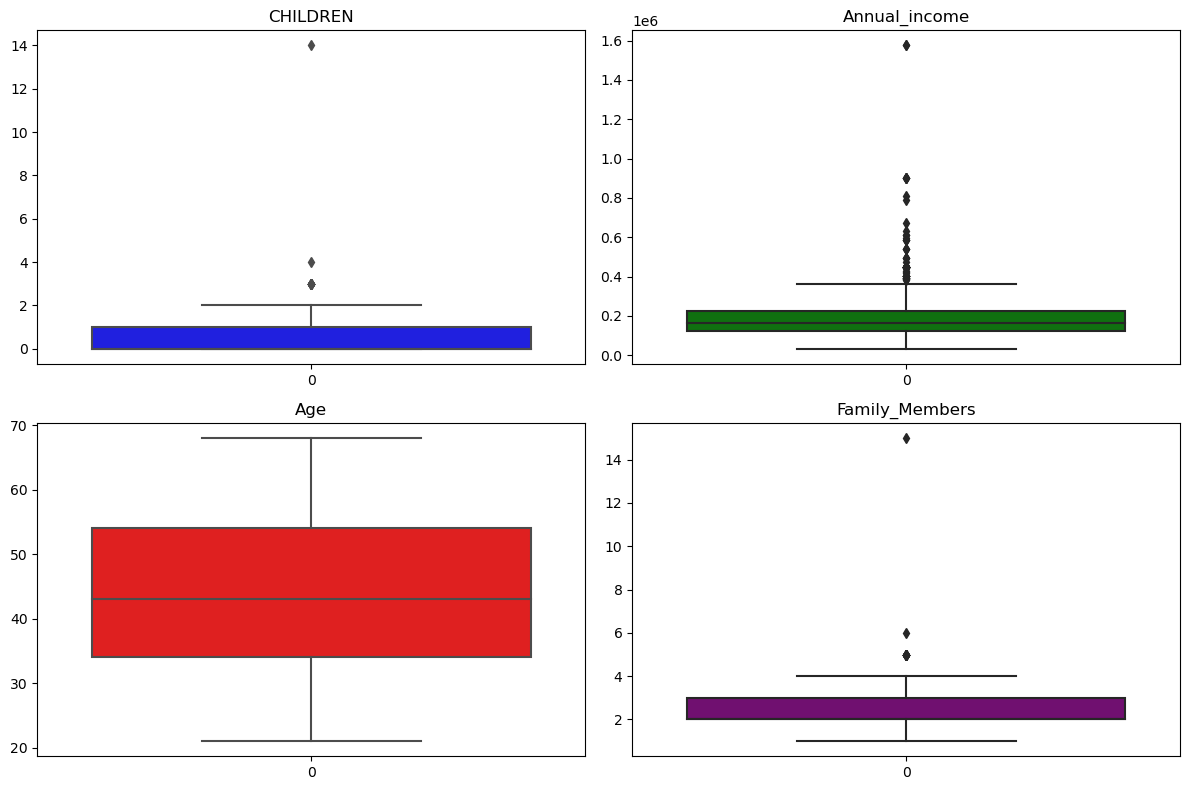

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to Create boxplots for
columns_to_plot = ["CHILDREN", 'Annual_income', "Age", "Family_Members"]

# Create a list of different colors
colors = ["blue", "green", "red", "purple"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through columns and create boxplots with different colors
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df[column], ax=axes[i // 2, i % 2], palette=[colors[i]])
    axes[i // 2, i % 2].set_title(column)

# Adjust Layout
plt.tight_layout()
plt.show()


#### So The dataset contains outliers in features like "Annual_income", "CHILDREN", and "Family_Members"

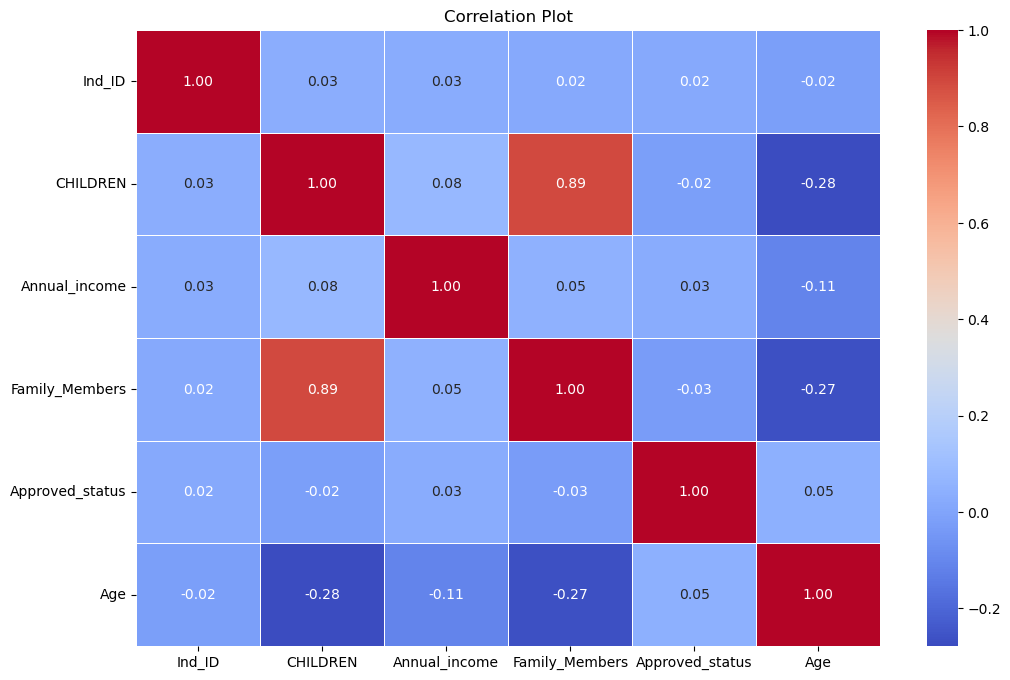

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # Fixed the "linew" to "linewidths"
plt.title("Correlation Plot")
plt.show()


It has shown tht there is a strong relation between family size and the no of children in  fimly,

#### These observation highlght the need for data preprocessing, addreshing missing values, handling outliers, and addressing class imbalance befor buliding machine learning models.

# Data Preprocessing 
###### Handle Missing values

In [33]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Type_Occupation    488
Family_Members       0
Approved_status      0
Age                 22
Employed_status      0
dtype: int64

In [34]:
df["Annual_income"] = df["Annual_income"].fillna(df["Annual_income"].median())
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["GENDER"] = df["GENDER"].fillna(df["GENDER"].mode()[0])

In [35]:
df.drop(columns = "Type_Occupation",inplace = True)

#### Handle Outlier in Dataset


In [36]:
Q1 = df["Annual_income"].quantile(0.25)
Q3 = df["Annual_income"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)  # Corrected to subtraction

df["Annual_income"] = df["Annual_income"].clip(lower=lower_limit, upper=upper_limit)


## SAVE OUR CLEAN DATA

In [37]:
df.to_excel("Creadit_cards_cleaned.xlsx", index = False)

In [38]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Family_Members     0
Approved_status    0
Age                0
Employed_status    0
dtype: int64

In [39]:
df = df.drop(columns = ["Ind_ID"])

In [40]:
df.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Family_Members', 'Approved_status', 'Age', 'Employed_status'],
      dtype='object')

## Feature Encoding:

In [41]:
categorical_column = []
for i in df.columns:
    if df[i].dtype=="object":
        categorical_column.append(i)
categorical_column

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type',
 'Employed_status']

### Dummy Encoding

In [42]:
XX = pd.get_dummies(df,columns = categorical_column, drop_first=True)

##### Seperate Independent variable(X) and Dependent Variable(y)

In [43]:
X = XX.drop("Approved_status",1)
y = df["Approved_status"]

#### Split the data into training and tesing sets

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=16)

In [45]:
print(len(X_train))
print(len(X_test))

1238
310


## Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling
#### Logistic Regression:


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

logistic = LogisticRegression(random_state=16)
logistic.fit(X_train, y_train)

log_pred_train = logistic.predict(X_train)
log_pred_test = logistic.predict(X_test)

# Evaluation
log_Train_Accuracy = accuracy_score(y_train, log_pred_train) * 100
print("Train Accuracy:", log_Train_Accuracy)

log_Test_Accuracy = accuracy_score(y_test, log_pred_test) * 100
print("Test Accuracy:", log_Test_Accuracy)

Log_CV = cross_val_score(logistic, X_test, y_test, cv=5, scoring="accuracy")
print("Cross-Validation Score:",Log_CV.mean() * 100)


Train Accuracy: 89.01453957996769
Test Accuracy: 89.6774193548387
Cross-Validation Score: 88.06451612903226


### SVM Hyperparameter Tuning

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sv_model = SVC()
param_grid = {"C":[0.1,1,10,100],
             "gamma":[1,0.1,0.01,0.001],
             "kernel":["rbf","poly","sigmoid"]}
grid_search = GridSearchCV(estimator = sv_model, param_grid = param_grid,cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:",best_params)

Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


### Support Vector Machine:

In [82]:
sv_model = SVC(C=1, gamma=1, kernel="rbf", random_state=15)
sv_model.fit(X_train, y_train)

# Prediction
ypred_train = sv_model.predict(X_train)
ypred_test = sv_model.predict(X_test)

# Evaluation
SVM_Train_Accuracy = accuracy_score(y_train, ypred_train) * 100
print("Train Accuracy:",SVM_Train_Accuracy)
SVM_Test_Accuracy = accuracy_score(y_test, ypred_test) * 100
print("Test Accuracy:",SVM_Test_Accuracy)

# Cross-validation
SVM_CV = cross_val_score(sv_model, X_test, y_test, cv=5, scoring="accuracy")
print(f"Cross-validation Score: {cross_val_scores.mean() * 100:.2f}%")


Train Accuracy: 94.34571890145395
Test Accuracy: 90.0
Cross-validation Score: 88.39%


### DT Hyperparameter Tuning

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=15)
param_grid={"criterion":["gini","entropy"],
           "max_depth":list(range(1,16))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(X_train,y_train)
best_params = grid.best_params_
print("Best parameters:",best_params)

Best parameters: {'criterion': 'gini', 'max_depth': 1}


## DECISION TREE:

In [85]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=15)
dt_model.fit(X_train, y_train)

# Predictions
ypred_train = dt_model.predict(X_train)
ypred_test = dt_model.predict(X_test)

# Evaluation
DT_Train_Accuracy = accuracy_score(y_train, ypred_train) * 100
DT_Test_Accuracy = accuracy_score(y_test, ypred_test) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Cross-validation score
DT_CV = cross_val_score(dt_model, X_test, y_test, cv=5, scoring="accuracy").mean()
print(f"Cross-Validation Score: {DT_CV * 100:.2f}%")


Train Accuracy: 88.77%
Test Accuracy: 88.06%
Cross-Validation Score: 87.10%


### RF Hyperparameter Tunning

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "bootstrap": [True, False]  # Add the values to test for the "bootstrap" parameter
}

grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring="accuracy", cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'bootstrap': True, 'n_estimators': 400}


### RANDOM FOREST

In [96]:
# Modeling
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=400, bootstrap=True, random_state=14)
model.fit(X_train, y_train)

# Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score

RF_Train_Accuracy = accuracy_score(y_train, ypred_train) * 100
print(f"Train Accuracy: {RT_Train_Accuracy:.2f}%")

RF_Test_Accuracy = accuracy_score(y_test, ypred_test) * 100
print(f"Test Accuracy: {RT_Test_Accuracy:.2f}%")

# Cross-validation score
from sklearn.model_selection import cross_val_score

RF_CV = cross_val_score(model, X_test, y_test, cv=5, scoring="accuracy") * 100
print(f"Cross-validation scores: {RT_CV.mean():.2f}%")


Train Accuracy: 99.43%
Test Accuracy: 90.00%
Cross-validation scores: 88.06%


In [61]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.1/99.7 MB 939.4 kB/s eta 0:01:47
   ---------------------------------------- 0.2/99.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.5/99.7 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 0.7/99.7 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.8/99.7 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.9/99.7 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 1.1/99.7 MB 2.7 MB/s eta 0:00:37
    -------------------------------

### XGB Hyperparametor Tunning

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xg_model = XGBClassifier()
param_grid = {
    "n_estimators":[100,200,300,400,500],
    "max_depth":[None,10,20,30,40,50],
    "learning_rate":[0.1,0.01,0.001]
}

grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, cv=5, scoring="accuracy")
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

### XGBOOST

In [95]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(
    criterion="gini",  
    max_depth=1,
    random_state=16
)

# Fit the model on the training data
xg_model.fit(X_train, y_train)

# Prediction
ypred_train = xg_model.predict(X_train)
ypred_test = xg_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
XG_Train_Accuracy = accuracy_score(y_train, ypred_train) * 100
XG_Test_Accuracy = accuracy_score(y_test, ypred_test) * 100
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Cross-Validation
from sklearn.model_selection import cross_val_score
crossvalidation = cross_val_score(xg_model, X_test, y_test, cv=5, scoring="accuracy")
XG_CV = np.mean(crossvalidation) * 100
print(f"Cross-Validation Score: {cross_val_avg:.2f}%")


Train Accuracy: 88.77221324717286
Test Accuracy: 88.06451612903226
Cross-Validation Score: 88.06%


## Model Selection:

In [101]:
final_data = pd.DataFrame({"Model":['Logistic','SVM',"DT","RF","XGBOOST"],
                          "TRAIN_ACC_SCORE":[log_Train_Accuracy,
                                            SVM_Train_Accuracy,
                                            DT_Train_Accuracy,
                                            RF_Train_Accuracy,
                                            XG_Train_Accuracy],
                          "TEST_ACC_SCORE":[log_Test_Accuracy,
                                            SVM_Test_Accuracy,
                                            DT_Test_Accuracy,
                                            RF_Test_Accuracy,
                                            XG_Test_Accuracy],
                          "CV_SCORE":[Log_CV,
                                     SVM_CV,
                                     DT_CV,
                                     RF_CV,
                                     XG_CV]})

In [112]:
final_data

,Model,TRAIN_ACC_SCORE,TEST_ACC_SCORE,CV_SCORE
0,Logistic,89.014540,89.677419,"[0.8870967741935484, 0.8870967741935484, 0.903..."
1,SVM,94.345719,90.000000,"[0.9032258064516129, 0.8870967741935484, 0.903..."
2,DT,89.176090,88.064516,0.870968
3,RF,99.434572,90.000000,"[90.32258064516128, 88.70967741935483, 90.3225..."
4,XGBOOST,88.772213,88.064516,88.064516
